# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_LinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    np.random.shuffle(colors)
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))


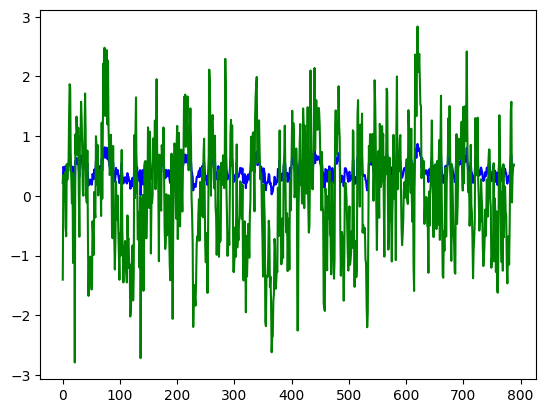

In [4]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# 1) Only contemporary week: temperature, precipitation, both

## temperature

### full data

In [3]:
import glob
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'
filenames = glob.glob(path + "/*.csv")

df = []
for file in filenames:
    df.append(pd.read_csv(file))
    
df = pd.concat(df, ignore_index=True)
print(min(df.x),max(df.x),min(df.y),max(df.y))
df

6.649860364384157 12.949860339180924 43.74986055078544 46.54986054189981


,date,y,x,year,week,cyclostationary_mean_tg,cyclostationary_mean_rr,cyclostationary_mean_tg_1w,cyclostationary_mean_tg_4w,cyclostationary_mean_tg_8w,cyclostationary_mean_tg_12w,cyclostationary_mean_tg_16w,cyclostationary_mean_tg_24w,cyclostationary_mean_rr_1w,cyclostationary_mean_rr_4w,cyclostationary_mean_rr_8w,cyclostationary_mean_rr_12w,cyclostationary_mean_rr_16w,cyclostationary_mean_rr_24w
0,2001-01-05,43.749861,12.14986,2001,1,2.009904,3.832692,2.009904,2.009904,2.009904,2.009904,2.009904,2.009904,3.832692,3.832692,3.832692,3.832692,3.832692,3.832692
1,2001-01-05,43.749861,12.24986,2001,1,2.067019,5.870192,2.067019,2.067019,2.067019,2.067019,2.067019,2.067019,5.870192,5.870192,5.870192,5.870192,5.870192,5.870192
2,2001-01-05,43.749861,12.34986,2001,1,1.852115,6.747115,1.852115,1.852115,1.852115,1.852115,1.852115,1.852115,6.747115,6.747115,6.747115,6.747115,6.747115,6.747115
3,2001-01-05,43.749861,12.44986,2001,1,1.326058,6.315385,1.326058,1.326058,1.326058,1.326058,1.326058,1.326058,6.315385,6.315385,6.315385,6.315385,6.315385,6.315385
4,2001-01-05,43.749861,12.54986,2001,1,0.919712,5.876923,0.919712,0.919712,0.919712,0.919712,0.919712,0.919712,5.876923,5.876923,5.876923,5.876923,5.876923,5.876923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972166,2022-06-24,45.149861,9.94986,2022,25,2.690385,-2.800962,2.272010,2.329204,1.385630,0.870501,1.147244,0.936656,-1.272072,-1.413951,-1.272724,-1.360520,-1.324643,-1.008920
972167,2022-06-24,45.149861,10.04986,2022,25,3.044231,-2.908654,2.598934,2.706495,1.759349,1.269219,1.527790,1.217671,-1.620804,-1.550787,-1.354406,-1.371571,-1.327258,-1.002166
972168,2022-06-24,45.249861,9.54986,2022,25,3.776635,-1.676923,3.400022,3.327979,2.531039,1.964117,2.186415,1.916099,-0.938462,-1.116958,-1.169462,-1.253882,-1.240283,-1.040775
972169,2022-06-24,45.249861,9.84986,2022,25,3.044519,-2.306731,2.604873,2.643358,1.767176,1.255820,1.511847,1.283886,-1.231774,-1.335385,-1.283196,-1.366569,-1.330153,-1.049503


In [4]:
df.columns

Index(['date', 'y', 'x', 'year', 'week', 'cyclostationary_mean_tg',
       'cyclostationary_mean_rr', 'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w', 'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],
      dtype='object')

In [5]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal,multiple=True, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 17

actual training score: 0.1641805693629541
actual validation score: 0.2675942094494834, number of remaining columns: 15

actual training score: 0.1647409787244113
actual va

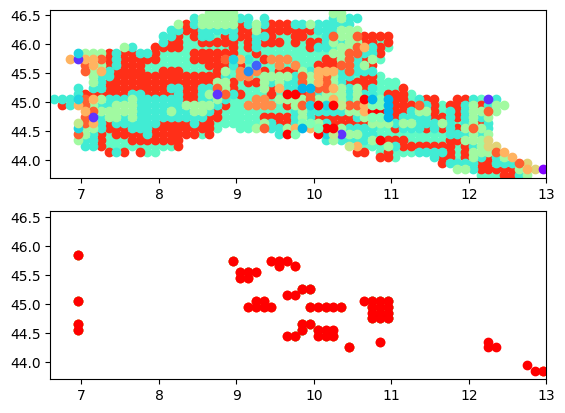

In [6]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

Full aggregate regression train score: 0.2656690690260266, test score: -0.07224614545299679
Aggregate regression train score with FS: 0.1941980413815596, test score: -0.09655918983715206
Full aggregate regression train score: 0.2656690690260266, test score: -0.07224614545299679
Aggregate regression train score with FS: 0.21583677570558035, test score: -0.07907852851624764


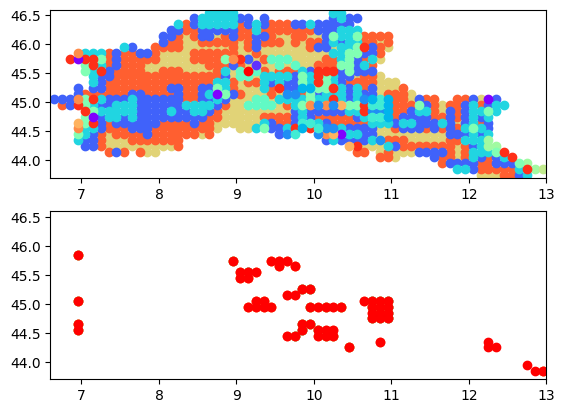

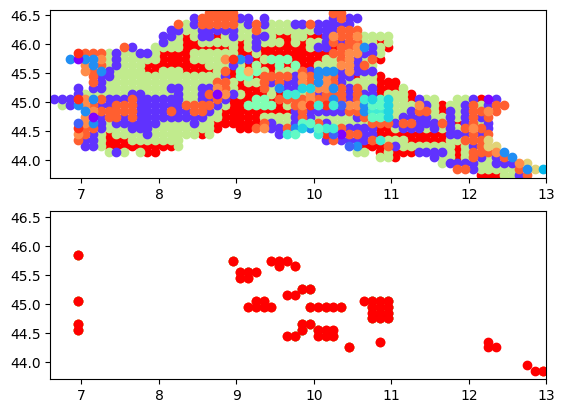

In [10]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


### not considering last years

In [11]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 12

actual training score: 0.14590497433179772
actual validation score: 0.22072661882600986, number of remaining columns: 10

actual training score: 0.1472439477397922
actual 

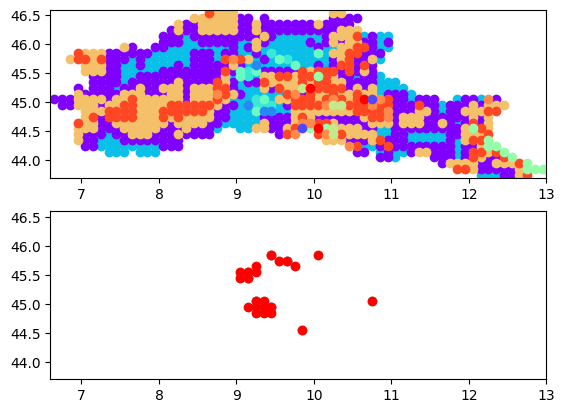

In [12]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

Full aggregate regression train score: 0.2258023685024424, test score: 0.05682219254519305
Aggregate regression train score with FS: 0.19138113631445708, test score: 0.14762838022369784
Full aggregate regression train score: 0.2258023685024424, test score: 0.05682219254519305
Aggregate regression train score with FS: 0.19138113631445708, test score: 0.14762838022369784


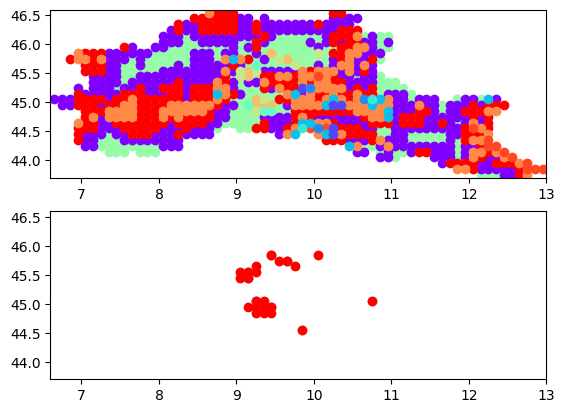

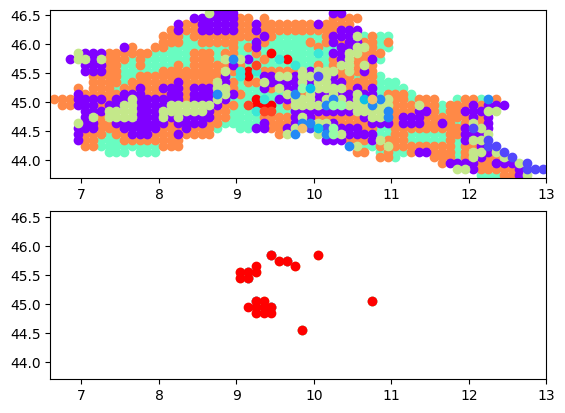

In [13]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


### repeat both with CMI FS

In [14]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal,multiple=True, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 17

----- MI Scores -----
[(9, 0.13299944616370707), (11, 0.12667077251898273), (8, 0.1239784192555458), (0, 0.12119797711621165), (13, 0.1208388498144807), (12, 0.11510289985

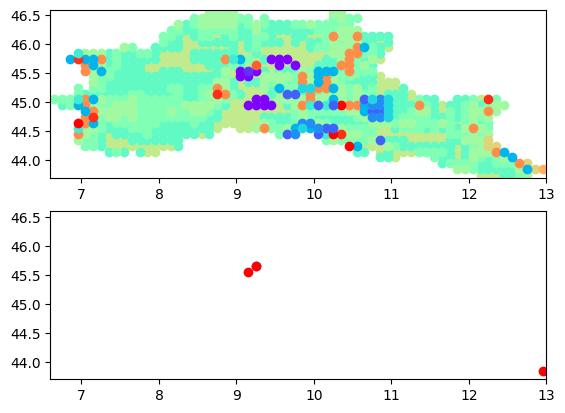

In [15]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

In [16]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 12

----- MI Scores -----
[(7, 0.1286787791673458), (0, 0.12374369750902679), (5, 0.1237203268683318), (11, 0.12187086949476401), (6, 0.12174013030552368), (3, 0.1185943350767

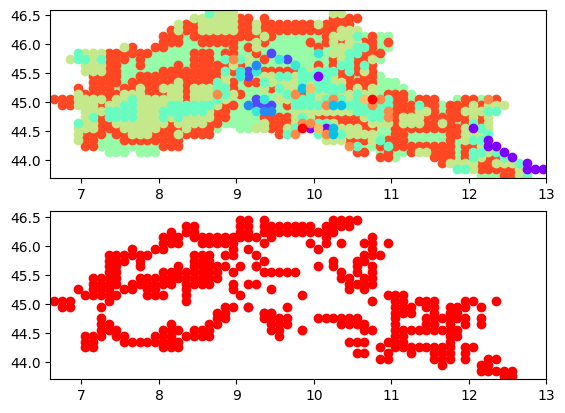

In [17]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

## precipitation

### full data

In [18]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal,multiple=True, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 23

actual training score: 0.08799116321083944
actual validation score: 0.0624184823546402, number of remaining columns: 21

actual training score: 0.09269094485509943
actual 

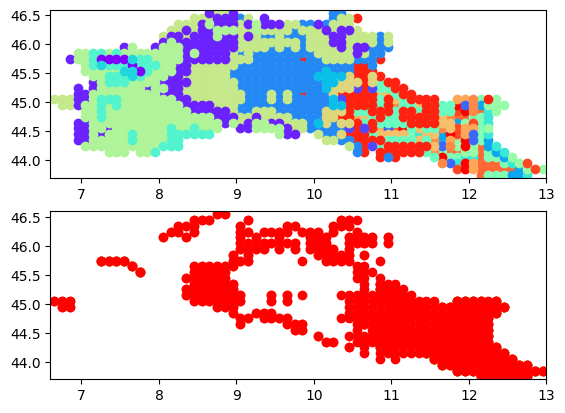

In [19]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

Full aggregate regression train score: 0.12039451375237409, test score: 0.06271395064544372
Aggregate regression train score with FS: 0.09425475735618338, test score: 0.08996011752981692
Full aggregate regression train score: 0.12039451375237409, test score: 0.06271395064544372
Aggregate regression train score with FS: 0.09805324278211802, test score: 0.0867256305660774


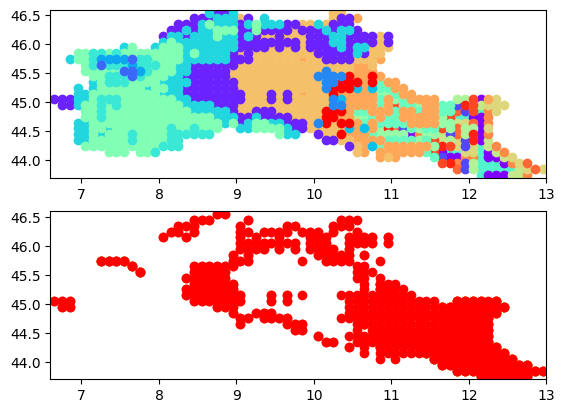

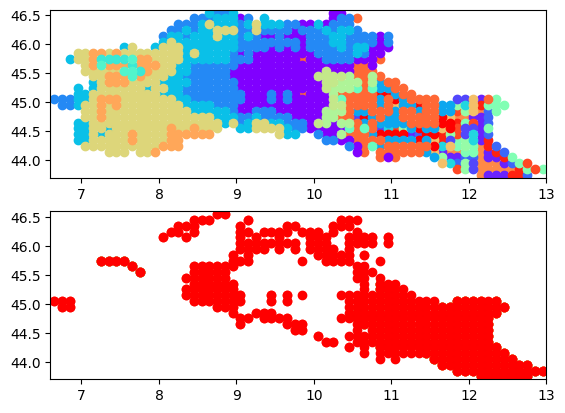

In [20]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


### not considering last years

In [21]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 26

actual training score: 0.11720936022056039
actual validation score: 0.007041071790290565, number of remaining columns: 24

actual training score: 0.11878900781921675
actua

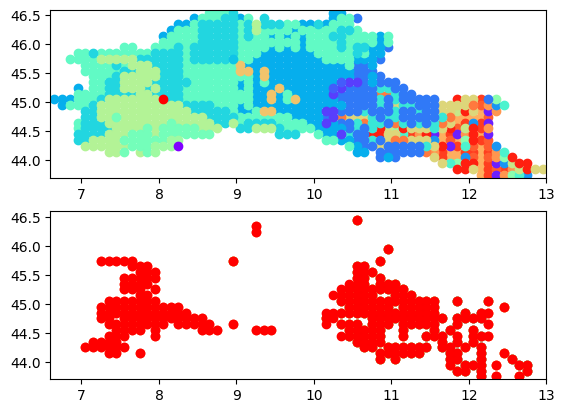

In [22]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

Full aggregate regression train score: 0.15462559822817812, test score: -0.012008267657622529
Aggregate regression train score with FS: 0.11541354906187173, test score: 0.016931543588454057
Full aggregate regression train score: 0.15462559822817812, test score: -0.012008267657622529
Aggregate regression train score with FS: 0.1287966985888046, test score: 0.02326091316751633


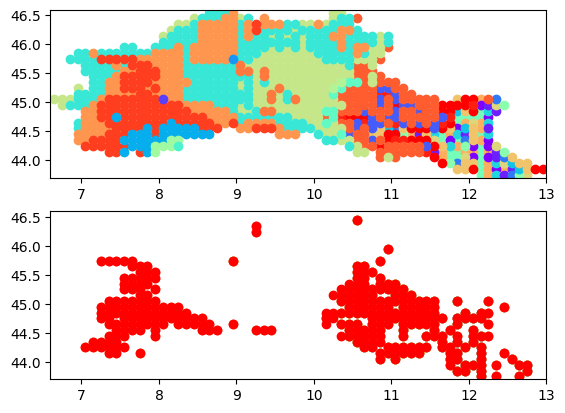

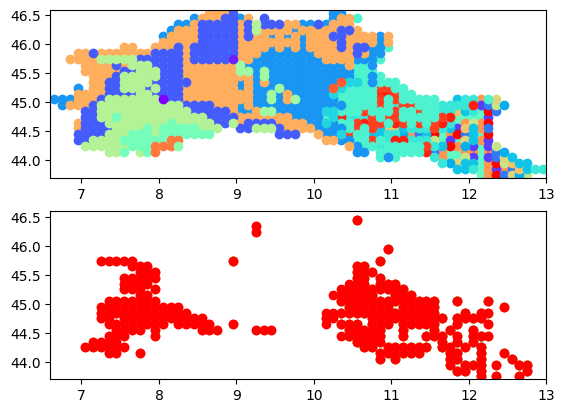

In [23]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])

plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)


### repeat both with CMI FS

In [24]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal,multiple=True, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 23

----- MI Scores -----
[(5, 0.06823215681560615), (1, 0.06560255279111699), (0, 0.06398068957143602), (12, 0.06369840313960955), (10, 0.06167814060167946), (11, 0.060710121

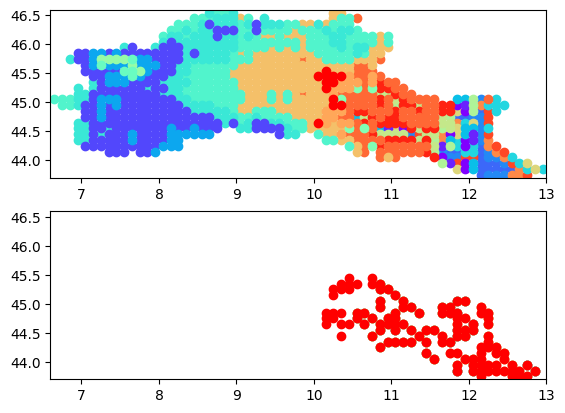

In [25]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

In [26]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 26

----- MI Scores -----
[(0, 0.10194430319429787), (7, 0.08350349827058232), (3, 0.08274029747752781), (1, 0.08233081542811345), (2, 0.0812638036768999), (4, 0.0781285384130

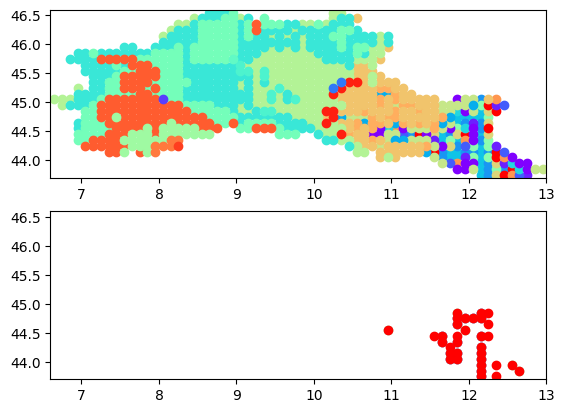

In [27]:
plot_cells(output,selected_colnames, xmin=6.6, xmax=13, ymin=43.7, ymax=46.6)

## both

### full data

In [28]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal,multiple=True, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)



target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 17

Number of features: 991

Number of aggregated features: 23

actual training score: 0.1641805693629541
actual validation score: 0.2675942094494834, number of remaining colu

In [29]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])



Full aggregate regression train score: 0.29999745066337224, test score: -0.078360356893588
Aggregate regression train score with FS: 0.1941980413815596, test score: -0.09655918983715206
Full aggregate regression train score: 0.29999745066337224, test score: -0.078360356893588
Aggregate regression train score with FS: 0.21678929228520627, test score: -0.06706959196441153


### not considering last years

In [30]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 12

Number of features: 991

Number of aggregated features: 26

actual training score: 0.14590497433179772
actual validation score: 0.22072661882600986, number of remaining co

In [31]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])



Full aggregate regression train score: 0.28213528497398044, test score: 0.048996304371028865
Aggregate regression train score with FS: 0.1962618553834803, test score: 0.13354128802781873
Full aggregate regression train score: 0.28213528497398044, test score: 0.048996304371028865
Aggregate regression train score with FS: 0.21413433149372518, test score: 0.09489425945674457


### repeat both with CMI FS

In [32]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal,multiple=True, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 17

Number of features: 991

Number of aggregated features: 23

----- MI Scores -----
[(9, 0.13299944616370707), (11, 0.12667077251898273), (8, 0.1239784192555458), (0, 0.1211

In [33]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg','cyclostationary_mean_rr'],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 12

Number of features: 991

Number of aggregated features: 26

----- MI Scores -----
[(7, 0.1286787791673458), (0, 0.12374369750902679), (5, 0.1237203268683318), (11, 0.12187

# 

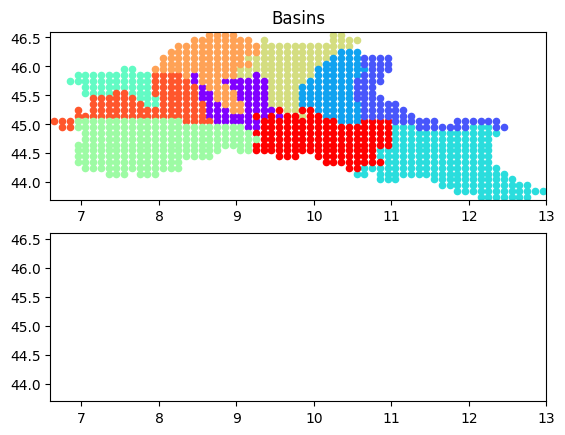

In [6]:
names = ['Adda_aggreg.csv','Lambro_Olona_aggreg.csv','Dora_aggreg.csv','Oglio_Iseo_aggreg.csv',
         'Emiliani1_aggreg.csv','Piemonte_Nord_aggreg.csv','Emiliani2_aggreg.csv','Piemonte_Sud_aggreg.csv',
         'Garda_Mincio_aggreg.csv','Ticino_aggreg.csv']
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg/'
import glob,os
xmin=6.6
xmax=13
ymin=43.7
ymax=46.6
colors = cm.rainbow(np.linspace(0,1,10))
np.random.shuffle(colors)
fig, ax = plt.subplots(2)
ax[0].set_xlim(xmin,xmax)
ax[1].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
ax[1].set_ylim(ymin,ymax)
ax[0].set_title("Basins")
for i in range(10):
    x=[]
    y=[]
    path_file = path+names[i]
    df = pd.read_csv(path_file)
    vals = df.groupby(['x','y']).count().index.values
    for j in range(len(vals)):
        x.append(vals[j][0])
        y.append(vals[j][1])
    ax[0].scatter(x,y,color=colors[i], s=20)

# 

## Emiliani 2, contemporary week:
## tests:
full data: max_train='2013-11-22', max_val='2018-04-10', max_test='2022-06-24'<br>
without last years: max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01'<br>
<br>
### temperature:
991 original features --> 133 aggregations with neighbours --> 25 wrapper FS<br>
train score:0.283, validation score: 0.43, test score: -0.16<br>
<br>
Without last years: 154 aggregations with neighbours --> 41 wrapper FS<br>
train score:0.553, validation score: 0.45, test score: 0.23<br>

### precipitation:
130 original features --> 24 aggregations with neighbours --> 5 wrapper FS<br>
train score:0.066, validation score: 0.039, test score: 0.065<br>
<br>
Without last years: 28 aggregations with neighbours --> 5 wrapper FS<br>
train score:0.0727, validation score: 0.010, test score: 0.058<br>

### both:
130+130 original features --> 42+24 aggregations with neighbours --> 24 wrapper FS<br>
train score:0.2358, validation score: 0.329, test score: 0.019<br>
<br>
Without last years: 41+28 aggregations with neighbours --> 29 wrapper FS<br>
train score:0.264, validation score: 0.29, test score: 0.186<br>
